<a href="https://colab.research.google.com/github/chaihermes/modelos_classificacao/blob/main/Modelos_de_Classifica%C3%A7%C3%A3o_em_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Recrutamento preditivo**

A empresa de tecnologia HighTech busca contratar os melhores profissionais do mercado para fazer parte do time e gerar valor para a empresa. A HighTech vem investindo muito nos últimos anos no uso de ciência de dados no setor do RH para trazer ganhos no processo de seleção e recrutamento. O time de ciência de dados junto com o time de RH vem realizando juntos um projeto de recrutamento preditivo.

O recrutamento preditivo é uma técnica de People Analytics para encontrar os melhores candidatos para contratação da empresa, na prática, o recrutamento preditivo aumenta as chances do recrutador potencializar o processo de seleção. Por meio da coleta e análise de dados, é possível avaliar o perfil e o fit cultural dos profissionais para entender se existe uma boa aderência à vaga.

**Problema de negócio:**

O objetivo da HighTech é identificar quais são os melhores indicadores para realizar o recrutamento de profissionais.

**Base de dados**

Este conjunto de dados consiste em algumas características como: percentual de ensino médio e superior e especialização, experiência de trabalho e ofertas salariais para os profissionais colocados.

**Desafio**

Você como cientista de dados do time de dados da HighTech tem o desafio de criar um modelo preditivo de recrutamento para prever como e quais são as melhores variáveis que podem colocar um profissional bem qualificado na HighTech.

**Importando a base de dados**

In [ ]:
import pandas as pd

dados = pd.read_excel("Recrutamento.xlsx")

dados.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Yes,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,No,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Yes,425000.0


In [ ]:
dados.shape

(215, 15)

Inferência sobre a base de dados:
**negrito**
Podemos observar que temos algumas variáveis como: gênero, desempenho educacional, score de desempenho educacional, status de contratação, salário.

**Variável Target**: No nosso case a target é a coluna status.

In [ ]:
set(dados.status)

{'No', 'Yes'}

In [ ]:
dados.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


Inferência sobre os dados:

Métricas de pontuação sobre ensino: ssc_p hsc_p degree_p estet_p mba_p

sl_no é um código, então não faz sentido na análise.

salary vem após a contratação.

Observando valores nulos:

<Axes: >

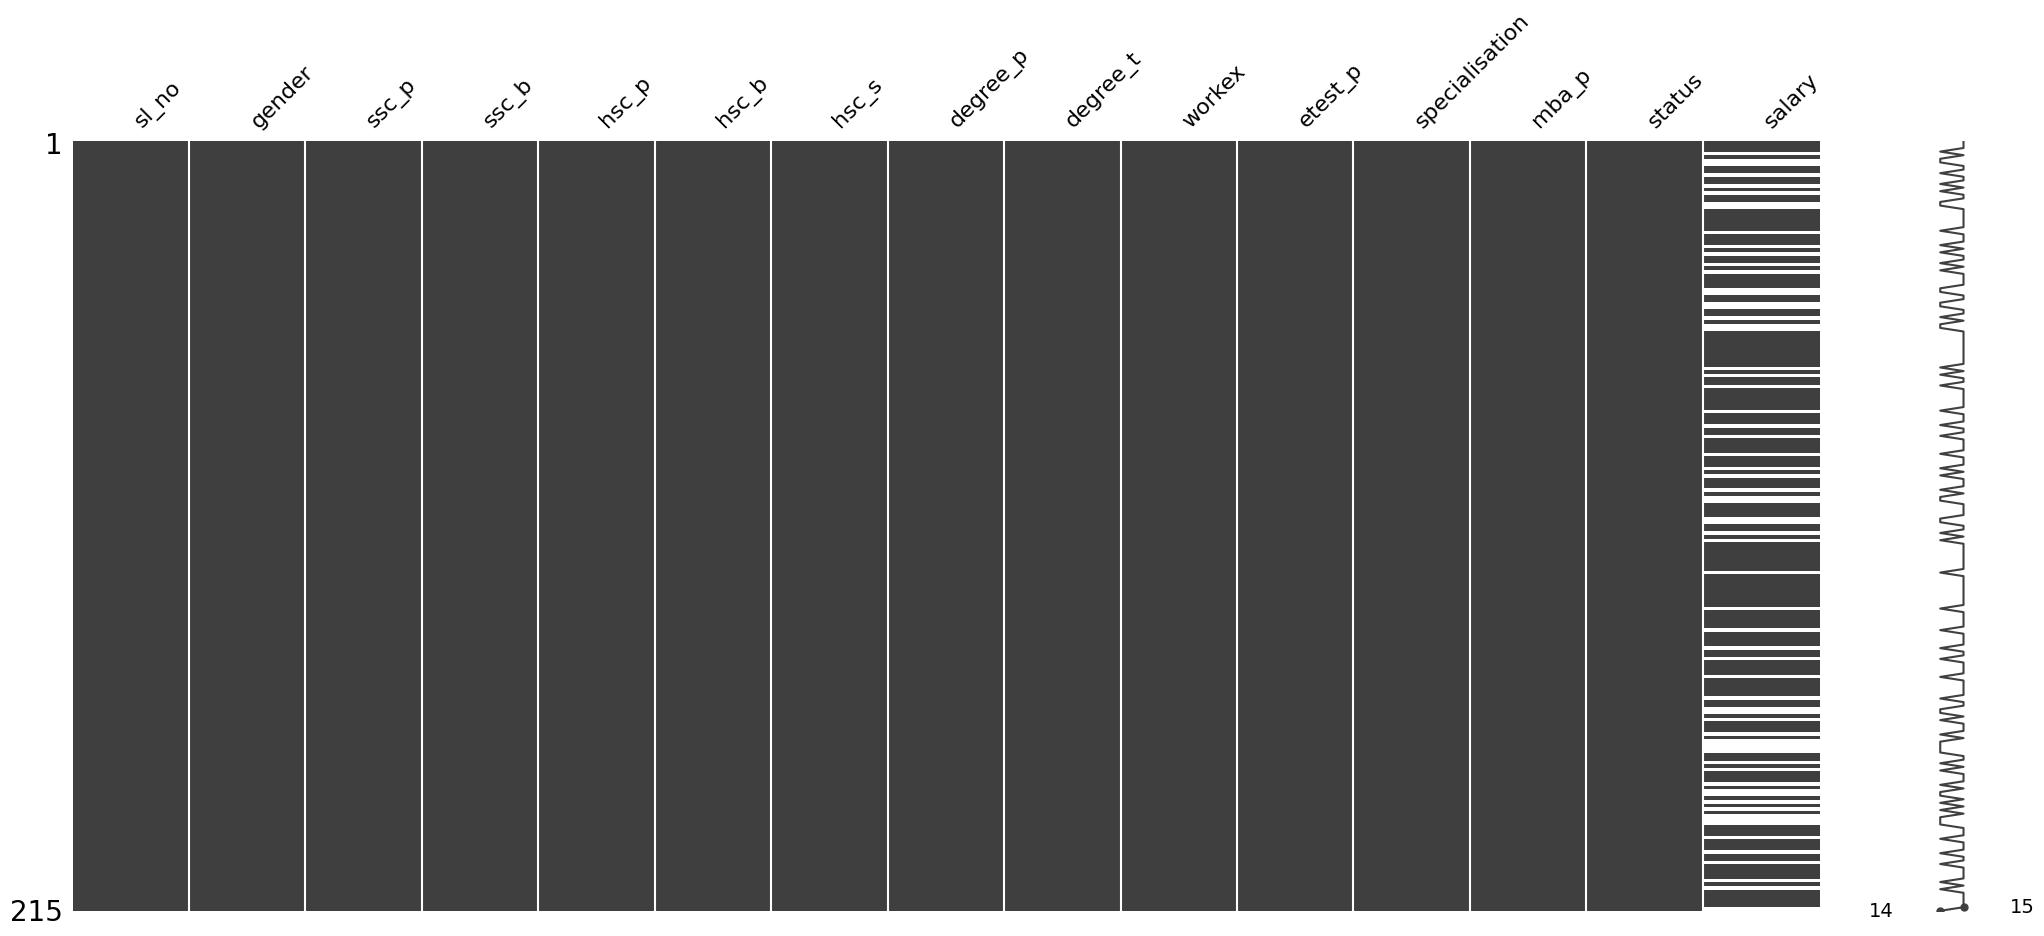

In [ ]:
import missingno as msno

msno.matrix(dados)

In [ ]:
dados.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

<ipython-input-11-8c081919360e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.boxplot(x="status", y="salary", data=dados, palette="hls")


<Axes: xlabel='status', ylabel='salary'>

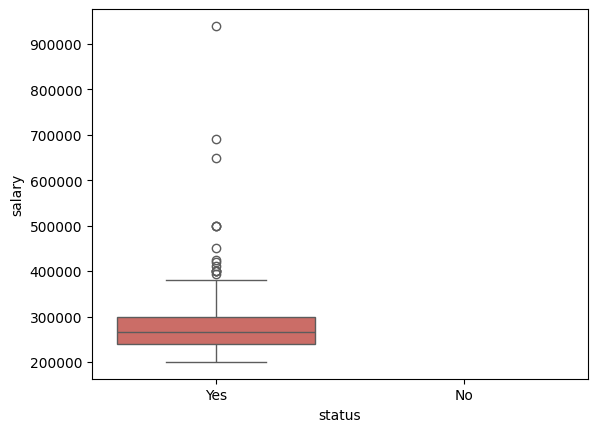

In [ ]:
import seaborn as sb

sb.boxplot(x="status", y="salary", data=dados, palette="hls")

Inferência sobre os dados:

Observe que para a variável salário, os valores nulos estão atribuídos a variável do tipo status quando o status é "não", ou seja, para os não contratados temos algumas pessoas da base sem salário atribuído.

Como podemos realizar a tratativa dos valores nulos?

In [ ]:
dados["salary"].fillna(value=0, inplace=True)      # fillna preenche com o parâmetro dado. Value é o valor que será preenchido. Inplace=True diz que é verdadeiro. Mudança imediata.

In [ ]:
dados.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

Analisando as variáveis numéricas:

Vamos analisar e compreender a distribuição dos dados para cada métrica de pontuação de ensino. Será que temos outliers na base?

<Axes: xlabel='hsc_p'>

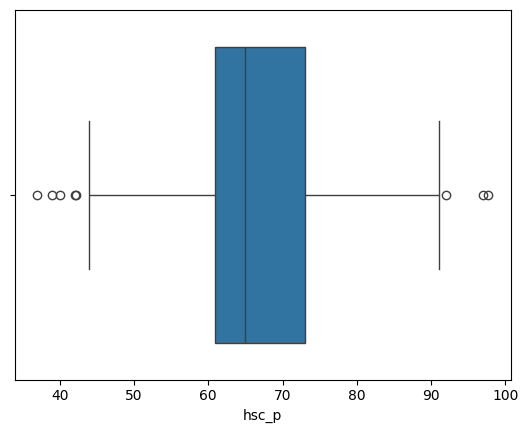

In [ ]:
sb.boxplot(x=dados["hsc_p"])

A concentração de dados está na parte azul.

As bolinhas são os outliers.

O traço dentro do retângulo azul é a média.

<Axes: xlabel='hsc_p', ylabel='Count'>

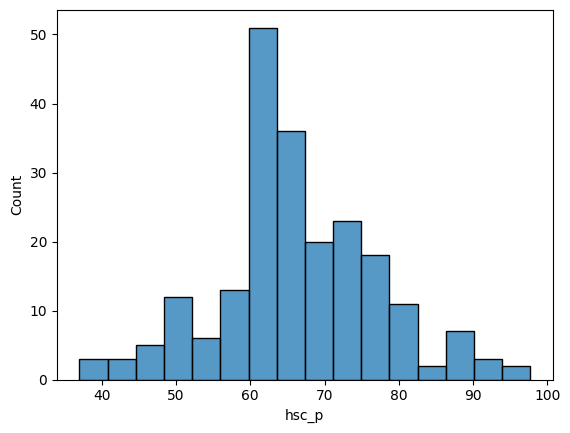

In [ ]:
sb.histplot(data=dados, x="hsc_p")

<Axes: xlabel='degree_p'>

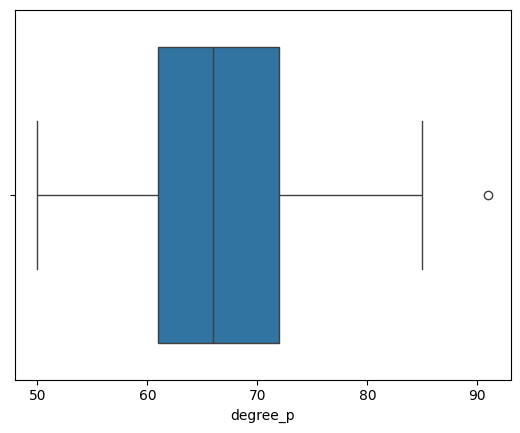

In [ ]:
sb.boxplot(x=dados["degree_p"])

<Axes: xlabel='degree_p', ylabel='Count'>

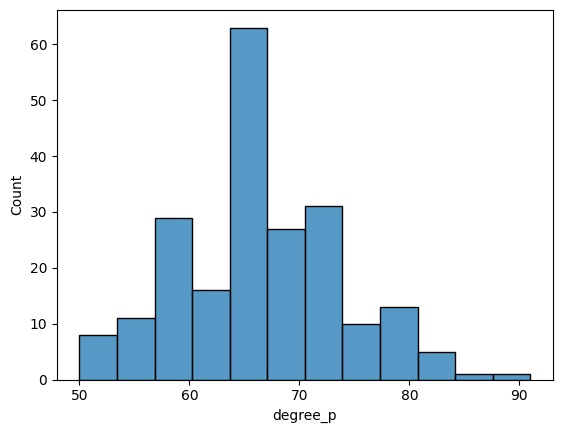

In [ ]:
sb.histplot(data=dados, x="degree_p")

<Axes: xlabel='etest_p'>

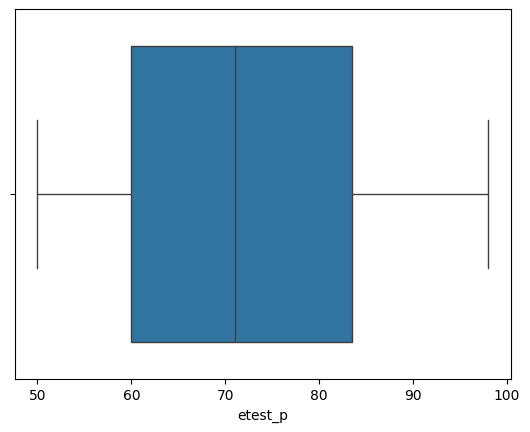

In [ ]:
sb.boxplot(x=dados["etest_p"])

<Axes: xlabel='etest_p', ylabel='Count'>

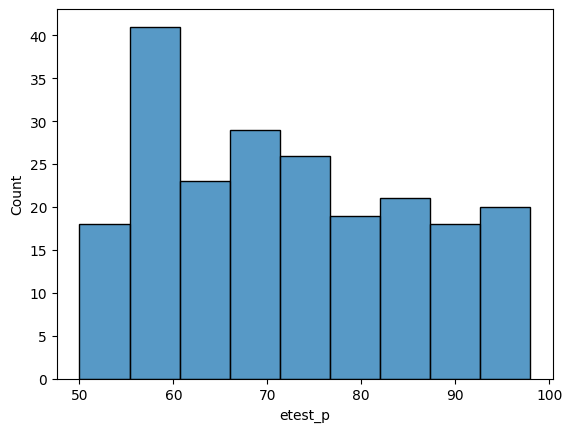

In [ ]:
sb.histplot(data=dados, x="etest_p")

<Axes: xlabel='mba_p'>

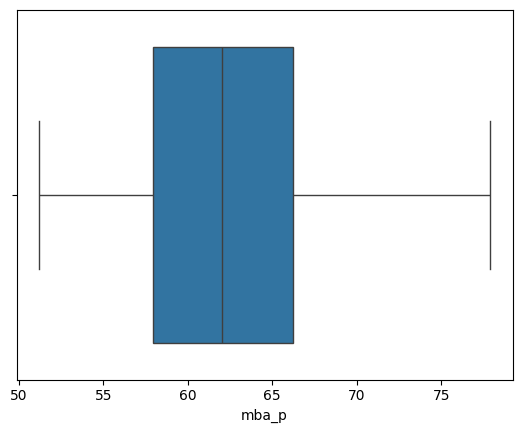

In [ ]:
sb.boxplot(x=dados["mba_p"])

<Axes: xlabel='salary'>

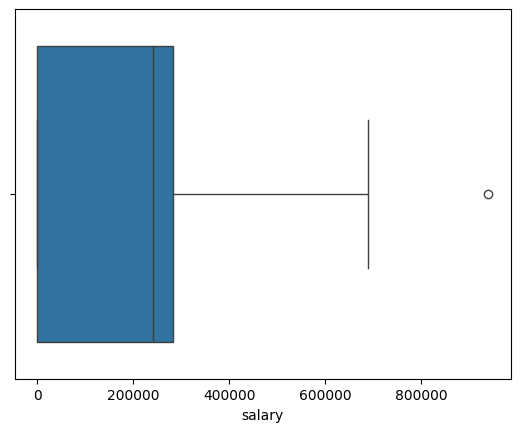

In [ ]:
sb.boxplot(x=dados["salary"])

<Axes: xlabel='salary', ylabel='Count'>

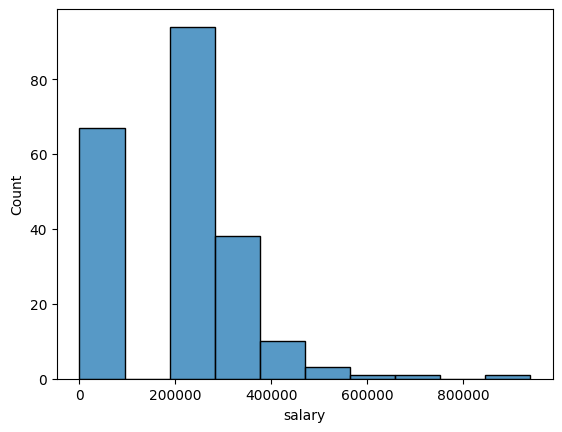

In [ ]:
sb.histplot(data=dados, x="salary")

Será que os scores acadêmicos influenciam na contratação? E a experiência de trabalho?

[Text(36.5, 0.5, 'mba_p')]

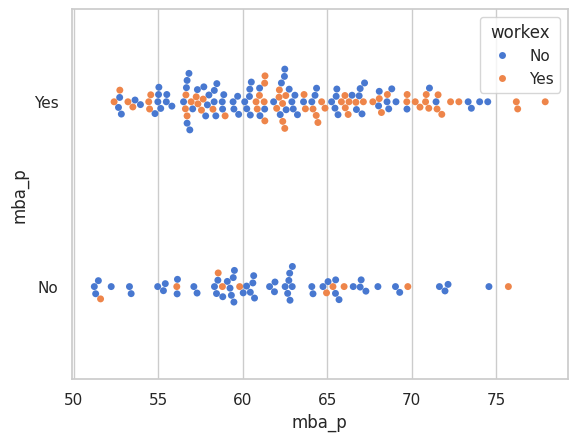

In [ ]:
sb.set_theme(style="whitegrid", palette="muted")

ax=sb.swarmplot(data=dados, x="mba_p", y="status", hue="workex")
ax.set(ylabel="mba_p")

Inferência dos dados:

Podemos observar que a pontuação de MBA pode influência sim na decisão de contratação, temos um grande concetração de dados sobre profissionais que possuem score de mba_p e com esperiência de trabalho.

Existe algum viés de gênero ao oferecer remuneração?

In [ ]:
! pip install plotly_express

In [ ]:
import plotly_express as px

In [ ]:
px.violin(dados, y="salary", x="specialisation", color="gender", box=True, points="all")

Inferência sobre os dados:

Os maiores salários foram dados aos homens. O salário médio oferecido também foi maior para homens.

Vamos analisar a correlação entre as pontuações de desempenho acadêmico com a contratação:

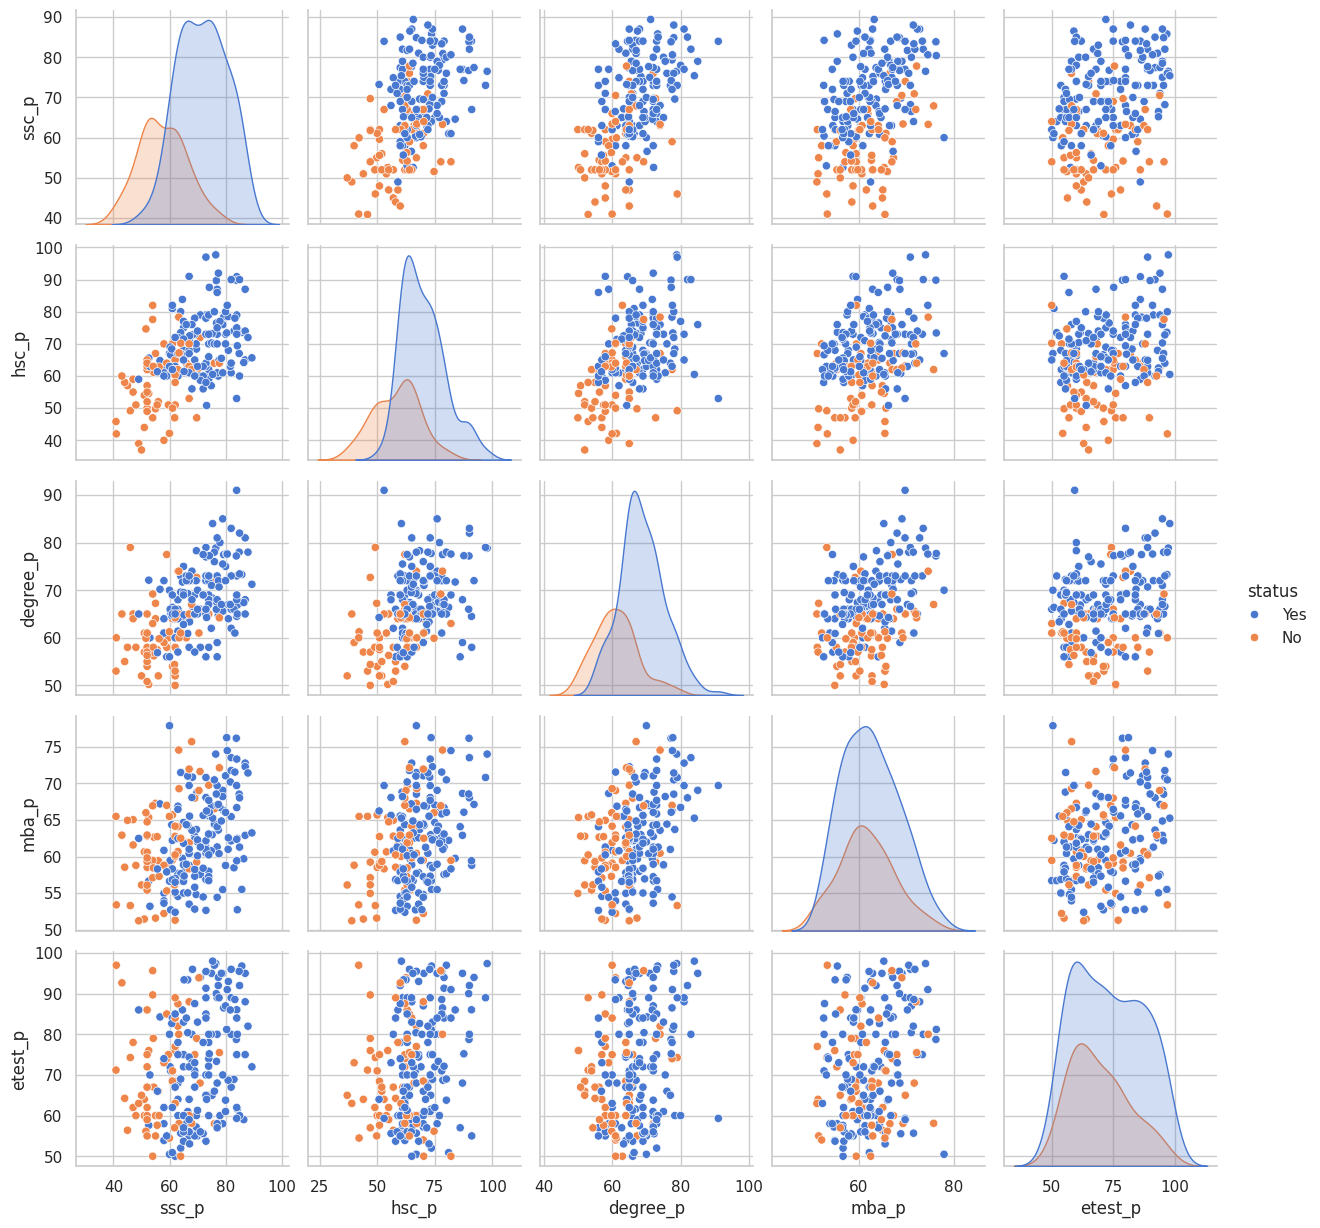

In [ ]:
sb.pairplot(dados,vars=['ssc_p','hsc_p','degree_p','mba_p','etest_p'],hue="status")

Inferência sobre os dados:

Candidatos com pontuação alta no ensino médio e na graduação foram contratados. Quem obteve notas altas em suas escolas foi contratado.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

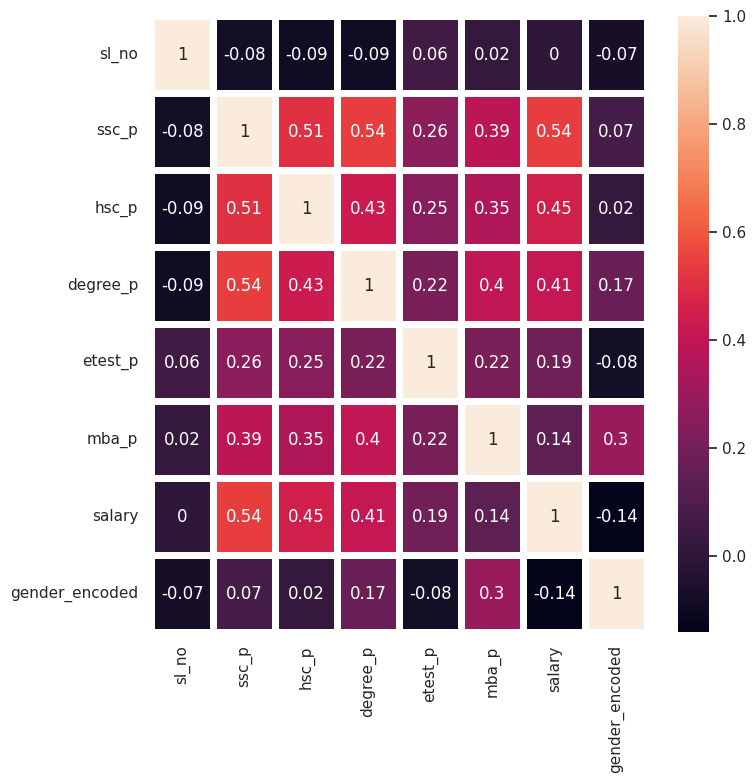

In [ ]:
# Convert categorical columns to numerical representations if needed
# For example, if 'gender' is a column with 'M' and 'F', you can use:
dados['gender_encoded'] = dados['gender'].map({'M': 0, 'F': 1})

# Select only numerical columns for correlation calculation
numerical_dados = dados.select_dtypes(include=['number'])

correlation_matriz = numerical_dados.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))

sb.heatmap(data=correlation_matriz, annot=True, linewidths=5, ax=ax)
plt.show()

Aqui somente conseguimos analisar a correlação entre as variáveis numéricas. Será que não seria importante também entender a correlação com as variéveis numéricas?

Vamos aplicar técnicas de transformação nos dados:

Vamos utilizar label enconder para tratar variáveis categoricas que possuem apenas dois tipos de categorias, como genero, especialização e status.

Para as demais categorias, vamos aplicar a tecnica de one hot enconing.

In [ ]:
from sklearn.preprocessing import LabelEncoder

colunas = ['gender', 'workex', 'specialisation', 'status']

label_encoder = LabelEncoder()

for coluna in colunas:
    dados[coluna] = label_encoder.fit_transform(dados[coluna])

In [ ]:
dados.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,gender_encoded
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0,0
1,2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0,0
2,3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0,0
3,4,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0,0
4,5,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0,0


Aplicando a técnica de one hot enconding:

In [ ]:
dummy_hsc_s = pd.get_dummies(dados['hsc_s'], prefix='dummy')
dummy_degree_t = pd.get_dummies(dados['degree_t'], prefix='dummy')

dados_dummy = pd.concat([dados, dummy_hsc_s, dummy_degree_t], axis=1)

dados_dummy.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,...,mba_p,status,salary,gender_encoded,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,...,58.80,1,270000.0,0,False,True,False,False,False,True
1,2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,...,66.28,1,200000.0,0,False,False,True,False,False,True
2,3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,...,57.80,1,250000.0,0,True,False,False,True,False,False
3,4,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,...,59.43,0,0.0,0,False,False,True,False,False,True
4,5,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,...,55.50,1,425000.0,0,False,True,False,True,False,False


In [ ]:
dados_dummy.drop(['hsc_s', 'degree_t', 'salary'], axis=1, inplace=True)

In [ ]:
dados_dummy.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,gender_encoded,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,1,67.00,Others,91.00,Others,58.00,0,55.0,1,58.80,1,0,False,True,False,False,False,True
1,2,1,79.33,Central,78.33,Others,77.48,1,86.5,0,66.28,1,0,False,False,True,False,False,True
2,3,1,65.00,Central,68.00,Central,64.00,0,75.0,0,57.80,1,0,True,False,False,True,False,False
3,4,1,56.00,Central,52.00,Central,52.00,0,66.0,1,59.43,0,0,False,False,True,False,False,True
4,5,1,85.80,Central,73.60,Central,73.30,0,96.8,0,55.50,1,0,False,True,False,True,False,False


<Axes: >

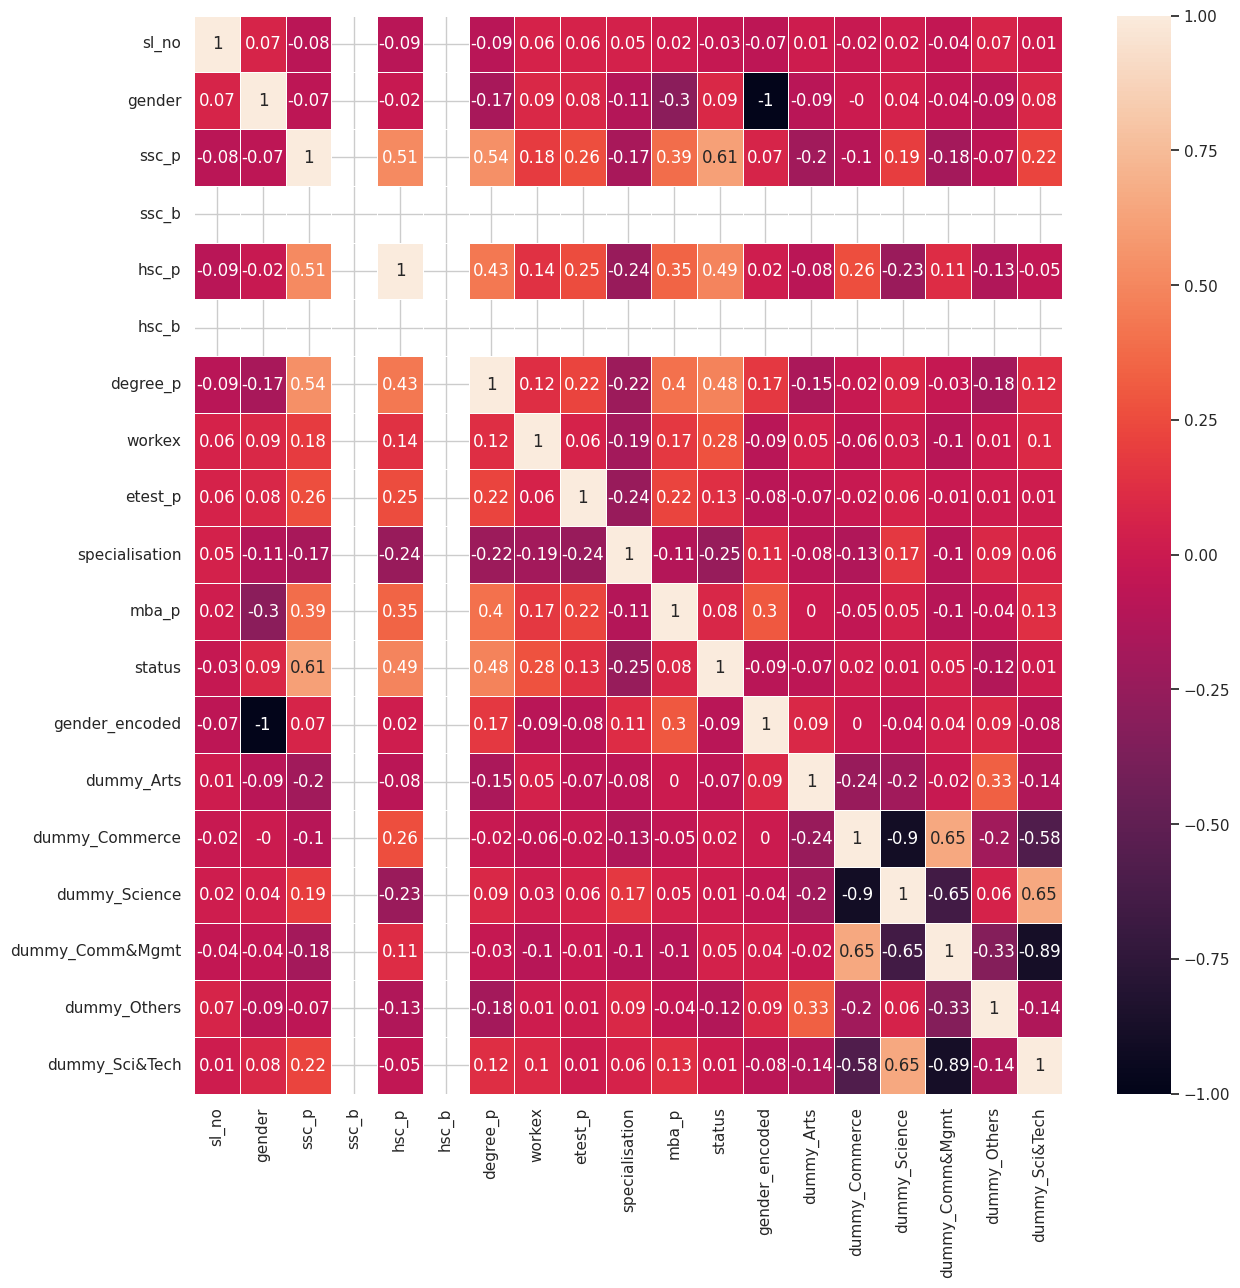

In [ ]:
# Convert all columns to numeric, coercing errors to NaN
dados_dummy = dados_dummy.apply(pd.to_numeric, errors='coerce')

correlation_matriz = dados_dummy.corr().round(2)

fig, ax = plt.subplots(figsize=(14,14))

sb.heatmap(data=correlation_matriz, annot=True, linewidths=.5, ax=ax)

Agora, conseguimos analisar as correlações!

Analisando a correlação e a análise de dados, podemos considerar algumas variáveis como possíveis fortes features para nosso modelo de classificação!

Mas lembre-se, correlação não é causalidade!

Analisando algumas variáveis e sua correlação com a variável status, podemos identificar que as variáveis workex, degree_p, hsc_p e ssc_p possuem uma correlação interessante na contratação.

A maior correlação de status de contratação está com o score de ssc_p, ou seja, pessoas com alto score de ssc_p são mais contratadas.

Vamos analisar?

In [ ]:
x = dados_dummy[['ssc_p', 'hsc_p', 'degree_p', 'workex', 'mba_p']]
y = dados_dummy['status']

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=7)

In [ ]:
x_train.shape

(172, 5)

In [ ]:
x_test.shape


(43, 5)

In [ ]:
x

,ssc_p,hsc_p,degree_p,workex,mba_p
0,67.00,91.00,58.00,0,58.80
1,79.33,78.33,77.48,1,66.28
2,65.00,68.00,64.00,0,57.80
3,56.00,52.00,52.00,0,59.43
4,85.80,73.60,73.30,0,55.50
...,...,...,...,...,...
210,80.60,82.00,77.60,0,74.49
211,58.00,60.00,72.00,0,53.62
212,67.00,67.00,73.00,1,69.72
213,74.00,66.00,58.00,0,60.23


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
scaler = StandardScaler()

scaler.fit(x_train)

x_train_escalonado = scaler.transform(x_train)
x_test_escalonado = scaler.transform(x_test)

In [ ]:
x_train_escalonado

array([[-1.92672757, -0.66933853, -0.31559155, -0.70402569, -0.11827471],
       [ 0.26708378, -0.33015908, -0.72064899, -0.70402569,  1.18141841],
       [-0.89983715, -0.57243011,  0.76456162, -0.70402569, -1.50694011],
       [ 1.06059001,  0.97810451,  2.51981052, -0.70402569,  1.18665207],
       [-1.4599592 , -1.54151426, -0.72064899, -0.70402569, -0.6521084 ],
       [ 0.30349171,  0.58853269, -0.09956092, -0.70402569,  1.63500259],
       [ 0.50046796, -0.76624694, -1.39574473, -0.70402569, -1.67790646],
       [ 1.80741941, -0.08788804,  1.97973393,  1.42040271,  1.83562636],
       [-0.05965408, -0.28170487, -0.31559155, -0.70402569, -0.06768263],
       [-0.43306878, -0.37861329, -0.18057241, -0.70402569, -0.27354006],
       [-0.43306878,  0.00902037, -0.31559155, -0.70402569,  0.31786392],
       [-0.52642246, -0.54045034, -0.28723753, -0.70402569, -0.39042522],
       [-1.55331288, -2.12296474, -1.26072558, -0.70402569, -1.88550845],
       [-0.7131298 , -0.28170487, -1.3

In [ ]:
import numpy as np

In [ ]:
error = []

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_escalonado, y_train)
    pred_i = knn.predict(x_test_escalonado)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Erro médio')

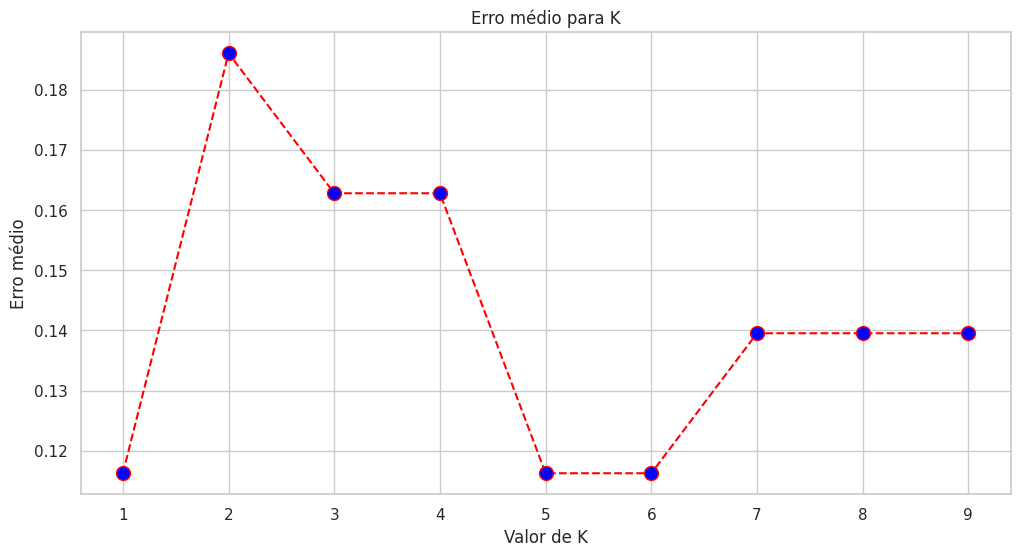

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Erro médio para K')
plt.xlabel('Valor de K')
plt.ylabel('Erro médio')

In [ ]:
modelo_classificador = KNeighborsClassifier(n_neighbors=5)

modelo_classificador.fit(x_train_escalonado, y_train)

y_predict = modelo_classificador.predict(x_test_escalonado)

In [ ]:
y_predict

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Acurácia: ", accuracy_score(y_test, y_predict))

Acurácia:  0.8837209302325582


In [ ]:
# SVM
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [ ]:
svm = Pipeline([
    ('linear_svc', LinearSVC(C=1))
])

svm.fit(x_train_escalonado, y_train)

y_predict_svm = svm.predict(x_test_escalonado)

In [ ]:
print("Acurácia: ", accuracy_score(y_test, y_predict_svm))

Acurácia:  0.8604651162790697
